In [1]:
# importing standard python libraries
import numpy as np
import pandas as pd

# importing visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# importing db access credentials from env module
from env import password, user, host

# importing functions from prepare module
from prepare import basic_clean, lemmatize

# importing sklearn libraries
from sklearn.feature_extraction.text import TfidfVectorizer #tf-idf
from sklearn.model_selection import train_test_split #splitting data
from sklearn.linear_model import LogisticRegression #LinearRegression model algorithm
from sklearn.metrics import classification_report, accuracy_score #evaluation metrics

from pprint import pprint

Take the work we did in the lesson further:
- What other types of model (i.e. different classification algorithms) could you use?
- How do other models compare when trained on term frequency data alone, instead of TF-IDF values?


# Step 1 | Acquiring `ham_spam` data

In [10]:
# defining url string with db access credentials
def get_url_string(database, host = host, user = user, password = password):
    '''
    This function takes in a sql db name, host, user, and password assignments
    and returns a url string that can be used to access the database. 
    '''
    
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'
    
# defining sql query used to acquire data
query = '''
SELECT *
FROM spam
'''

# accessing db and reading query results to DataFrame
df = pd.read_sql(query, get_url_string('spam_db'), index_col = 'id')

# preview of raw data
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Step 2 | Cleaning data
A. `basic_clean`

In [23]:
# initializing an empty list that will hold cleaned strings
clean_text = []

# for loop to run through each string in the df and add to empty list
for string in df.text:
    clean_text.append(basic_clean(string))

# adding list of cleaned string to df
df['clean_text'] = clean_text

# previewing updated df
df.head()

,label,text,clean_text
id,,,
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...


B. `lemmatize`

In [24]:
# initializing an empty list that will hold lemmatized strings
lem_text = []

# for loop to run through each string in the df and add to empty list
for string in df.clean_text:
    lem_text.append(lemmatize(string))
    
# adding list of lemmatized strings to df
df['lem_text'] = lem_text

# previewing updated df
df.head()

,label,text,clean_text,lem_text
id,,,,
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don't think he go to usf he life around ...


C. `tokenize` and remove punctuation

In [28]:
df.lem_text[4]

"nah i don't think he go to usf he life around here though"

In [27]:
from prepare import tokenize

tokenize(df.lem_text[4])

"nah i don ' t think he go to usf he life around here though"

In [46]:
# importing nltk module and work_tokenize function
import nltk
from nltk.tokenize import word_tokenize

# initializing empty remove_punctuation list
remove_punct = []

# for loop that will run through each string in the lem_string series, tokenize the string, remove the 
#     puncutation tokens, and then join the tokens back to a string
for string in df.lem_text:    
    remove_punct.append(' '.join([word for word in word_tokenize(string) if word.isalpha()]))
    
# adding remove punctuation strings to df
df['remove_punct'] = remove_punct

# previewing updated df
df.head()

,label,text,clean_text,lem_text,remove_punct
id,,,,,
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in a wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don't think he go to usf he life around ...,nah i do think he go to usf he life around her...


D. `remove_stopwords`

In [47]:
# importing remove_stopwords functions from prepare module
from prepare import remove_stopwords

# initializing empty string that will hold last step of prepare, remove_stopwords strings, fully prepared
prepared_string = []

# for loop removing stopwords from each string in the remove_puct series of strings, appending the above list
for string in df.remove_punct:
    prepared_string.append(remove_stopwords(string))
    
# adding prepare string series to df
df['prepared_string'] = prepared_string

# previewing updated df
df.head()


,label,text,clean_text,lem_text,remove_punct,prepared_string
id,,,,,,
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in a wkly comp to win fa cup final ...,free entry wkly comp win fa cup final tkts may...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don't think he go to usf he life around ...,nah i do think he go to usf he life around her...,nah think go usf life around though


# Step 3 | `TF-IDF` transformation and data split
Transforming text to numerical values using **Term Frequency** *how often each word in the string appears in each document* and **Inverse Document Frequency** *a measure based on how many documents in which each word in the string will appear* <br>
<br>
After transforming the text data into numerical `tf-idf` values, we will then split in preparation for modeling and evaluation.

In [50]:
# creating tf-idf object
tfidf = TfidfVectorizer()

# splitting into X and y and tranforming prepared_string series into tf-idf values
X = tfidf.fit_transform(df.prepared_string)
y = df.label

# splitting data into train and test for X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = .2)

# creating df for y train and test target actual values
train = pd.DataFrame(dict(actual = y_train))
test = pd.DataFrame(dict(actual = y_test))

# previewing train and test predictions dfs
print(f'Train Preview:\n{train.head(2)}\n\nTest Preview:\n{test.head(2)}')

Train Preview:
     actual
id         
3592    ham
2618    ham

Test Preview:
     actual
id         
408     ham
4540    ham


# Step 4 | Modeling data
### 4a. Classification And Regression Tree `CART Decision Tree Algorithm`
### 4b. Random Forest `Random Forest Classifier Algorithm`
### 4c. K-Nearest Neighbor `KNN Algorithm`
### 4d. *

In [53]:
# importing Decision Tree object
from sklearn.tree import DecisionTreeClassifier, plot_tree

# creating Decision Tree model object
clf = DecisionTreeClassifier(max_depth = 3, random_state = 78)

# fitting the model to train data
clf = clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=78)

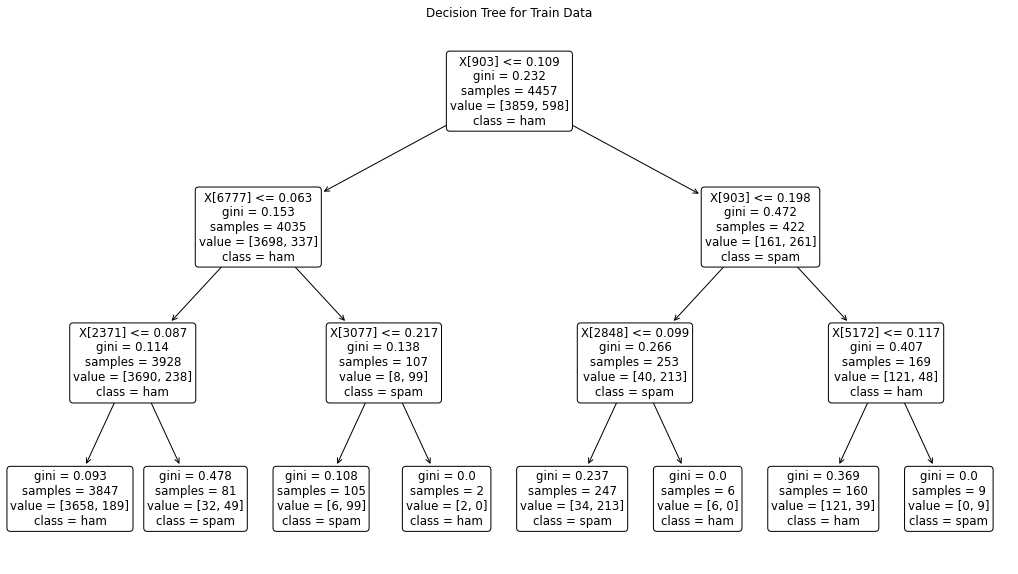

In [63]:
# visualizing the Decision Tree for the train data
plt.figure(figsize = (18, 10))
plot_tree(clf, class_names = clf.classes_, rounded = True)
plt.title('Decision Tree for Train Data')
plt.show()

In [73]:
# making predictions for train
train['DT_pred'] = clf.predict(X_train)
train

,actual,DT_pred
id,,
3592,ham,ham
2618,ham,ham
4432,ham,ham
1227,ham,ham
158,spam,spam
...,...,...
702,ham,ham
648,ham,ham
1696,ham,ham


In [87]:
# evaluating train predictions for Decision Tree Model
print('Evaluation Metrics for Decision Tree Model')
print()

# i. accuracy
print(f'i. Accuracy: {int(accuracy_score(train.actual, train.DT_pred).round(2)*100)}%')
print('------------------------------')
print()

# ii. Confusion Matrix
print(f'ii. Confusion Matrix\n\n{pd.crosstab(train.DT_pred, train.actual)}')
print('------------------------------')
print()

# iii. Classification Report
print(f'iii. Classification Report\n{classification_report(train.actual, train.DT_pred)}')

Evaluation Metrics for Decision Tree Model

i. Accuracy: 93%
------------------------------

ii. Confusion Matrix

actual    ham  spam
DT_pred            
ham      3787   228
spam       72   370
------------------------------

iii. Classification Report
              precision    recall  f1-score   support

         ham       0.94      0.98      0.96      3859
        spam       0.84      0.62      0.71       598

    accuracy                           0.93      4457
   macro avg       0.89      0.80      0.84      4457
weighted avg       0.93      0.93      0.93      4457



# Takeaways from `DT` Model
For this scenario we want to optimize our model to prevent `false-positives` so the evaluation metric that is most important would be the `precision`
>### Precision for Decision Tree on train data: 84%

### 4b. Random Forest `Random Forest Classifier Algorithm`

In [ ]:
# importing random forest function
from sklearn.ensemble import RandomForestClassifier

creating 
